In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Drop unnecessary columns
df = df[['v1', 'v2']]

# Rename columns
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [6]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [7]:
X = df['message']
y = df['label']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=3000
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [10]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [11]:
y_pred = model.predict(X_test_tfidf)


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9730941704035875

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.98      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[964   2]
 [ 28 121]]


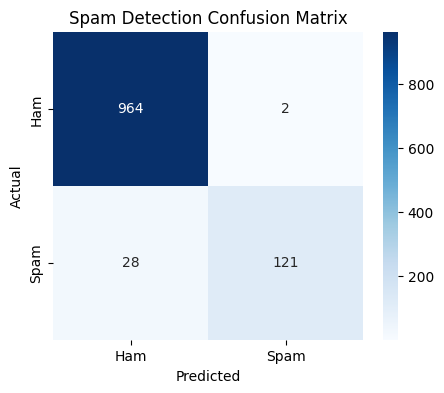

In [13]:
plt.figure(figsize=(5,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Ham', 'Spam'],
    yticklabels=['Ham', 'Spam']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Spam Detection Confusion Matrix")
plt.show()


In [14]:
new_message = ["You won a free prize! Click the link now"]

new_message_tfidf = vectorizer.transform(new_message)
prediction = model.predict(new_message_tfidf)

if prediction[0] == 1:
    print("Spam Message")
else:
    print("Not Spam Message")


Spam Message
